In [1]:

# TWTT uses meansquared error as the loss function



import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

#!Extracting a single ping(64209) from the data set

df80 = pd.read_csv('stave_Samples.csv')
df3000 = pd.read_csv('3000.csv')

df64209= df80[df80['pingNum'] == 64209]
df64209 = df64209[df64209['channel']%2 == 0]

# df64209 = df64209.reset_index()
# 
# inputDF = df64209

#! The group by is used to make the condense the data 

# df64209 = df64209.groupby(np.arange(len(df64209))//119.925).mean()

inputDF = df64209[['sample']]
inputDF = inputDF.reset_index()
inputDF = inputDF.drop(['index'], axis=1)
inputDF

# df3000
# inputDF = inputDF.reset_index()
# inputDF
# df80

#! The group by is used to make the condense the data 
# df64210 = df64210.groupby(np.arange(len(df64210))//119.925).mean()



,sample
0,36299.404785
1,54529.510254
2,34735.746338
3,3646.284424
4,12231.330566
...,...
47965,0.015869
47966,6.706299
47967,14.453125
47968,1.536133


In [2]:
#! Extracting an input to compare 
df64210= df80[df80['pingNum'] == 64210 ]
df64210 = df64210[df64210['channel']%2 == 0]
df64210 = df64210.reset_index()
df64210 = df64210.drop(['index'], axis=1)
df64210 = df64210[['sample']]
df64210
# image = df64210.plot.line()


,sample
0,39182.833252
1,34020.352783
2,40779.179932
3,187.395508
4,3720.706299
...,...
47965,15.519531
47966,6.953125
47967,3.453125
47968,5.785156


In [3]:
# The output for the testing 



#! Changed nuAngle to Angle
df_binned_64210 = df3000[['PingKey','Channel','TWTT','Angle','nuAngle']]
df_binned_64210 = df_binned_64210[df_binned_64210['PingKey'] == 64210]
df_binned_64210 = df_binned_64210[df_binned_64210['Channel'] == 0]
df_binned_64210 = df_binned_64210.reset_index()
df_binned_64210 = df_binned_64210.drop(['index'], axis=1)
# df_binned_64210 = df_binned_64210[['TWTT','nuAngle']]


df_binned_64210 = df_binned_64210[['nuAngle']]


df_binned_64210
# df3000

# df_binned_64210

#plot
# df_binned_64210

,nuAngle
0,0.444
1,0.906
2,1.452
3,1.920
4,2.226
...,...
395,68.916
396,68.958
397,69.018
398,69.096


In [4]:
#! Extracting a specific ping from output Data and even channels
df_binned_64209 = df3000[['PingKey','Channel','TWTT','nuAngle', 'Angle']]
df_binned_64209 = df_binned_64209[df_binned_64209['PingKey'] == 64209 ]
df_binned_64209 = df_binned_64209[df_binned_64209['Channel'] == 0]
df_binned_64209 = df_binned_64209.reset_index()
df_binned_64209 = df_binned_64209.drop(['index'], axis=1)
# outputDF = df_binned_64209[['TWTT','nuAngle']]
outputDF = df_binned_64209[['nuAngle']]
outputDF
#Different types of RNN, good with sequence Any sequence of data does not have to be time
#GRU, LSTM, RNN, SimpleRNN


,nuAngle
0,0.186
1,0.216
2,0.630
3,1.488
4,2.334
...,...
395,69.120
396,69.210
397,69.264
398,69.294


In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np






# sc = StandardScaler()
# inputScaled = sc.fit_transform(inputDF)


# sc2 = StandardScaler()

# outputScaled = sc2.fit_transform(outputDF)







inputData = np.array(inputDF)
# temp = inputData
# splitInput = []

# for i in range(0, len(inputData),119):

#     temp = inputData[i:i+119]
#     splitInput.append(temp)

# splitInput = splitInput[:400]
# splitInput = np.array(splitInput)

# splitInput.shape
# outputData = np.array(outputDF)

outputData = np.asarray(outputDF)

# print(splitInput)
# outputData.shape
# outputData = np.stack(outputDF, axis=0)  

# print(outputData.shape)



In [6]:
print('BEFORE RESHAPE')
print('OUTPUT DATA SHAPE:',outputData.shape)
print('INPUT DATA SHAPE:',inputData.shape)
# print('OUTPUT DATA:',outputData)

inputData = inputData.reshape(1,47970)
outputData = outputData.reshape(1,400)

print('AFTER RESHAPE')
print('OUTPUT DATA SHAPE:',outputData.shape)
print('INPUT DATA SHAPE:',inputData.shape)
# outputData[0][1]
# outputData[0][1][1]
#Covert these to tensors?
# outputData


BEFORE RESHAPE
OUTPUT DATA SHAPE: (400, 1)
INPUT DATA SHAPE: (47970, 1)
AFTER RESHAPE
OUTPUT DATA SHAPE: (1, 400)
INPUT DATA SHAPE: (1, 47970)


In [7]:
#! Validation Set

# sc3 = StandardScaler()
# testScaled = sc3.fit_transform(df64210)

# sc4 = StandardScaler()
# outputScaled = sc4.fit_transform(df_binned_64210)

testing_Input = np.array(df64210)
testing_Output = np.array(df_binned_64210)


test_inputData = testing_Input.reshape(1,47970)
test_outputData = testing_Output.reshape(1,400)

print('OUTPUT DATA SHAPE:',test_inputData.shape)
print('INPUT DATA SHAPE:',test_outputData.shape)
# print(testing_Input)

OUTPUT DATA SHAPE: (1, 47970)
INPUT DATA SHAPE: (1, 400)


In [8]:
import tensorflow as tf 



In [64]:
# define the keras model
# leaky_relu = LeakyReLU(alpha=0.01)
#Make it so input and output shape have the same batch size for the first number 
#Edit use linear, instead of relu
# model = Sequential()
# # model.add(Flatten())
# model.add(Dense(units = 1, input_shape = ((1,)) ,activation='linear'))
# model.add(Dropout(0.2))
# model.add(Dense(units = 400, activation='linear'))
# model.add(Dropout(0.2))
# model.add(Dense(units = 200, activation='linear'))
# model.add(Dropout(0.2))
# model.add(Dense(units = 4000, activation='linear'))
# # model.add(Dropout(0.2))
# model.add(Dense(units = 1, activation='sigmoid')) #SOFTMAX ACCORDING TO TRISTAN
# # model.build(input_shape = (47970,1))

# model.summary()





In [16]:
model = tf.keras.Sequential([

tf.keras.layers.Dense(1, input_shape=(47970,), activation='linear'),
tf.keras.layers.Dense(1000, activation='softmax'),
tf.keras.layers.Dense(900, activation='softmax'),
tf.keras.layers.Dense(800, activation='softmax'),
tf.keras.layers.Dense(700, activation='softmax'),
tf.keras.layers.Dense(600, activation='softmax'),
tf.keras.layers.Dense(500, activation='softmax'),

tf.keras.layers.Dense(400, activation='linear')




])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 47971     
                                                                 
 dense_9 (Dense)             (None, 1000)              2000      
                                                                 
 dense_10 (Dense)            (None, 900)               900900    
                                                                 
 dense_11 (Dense)            (None, 800)               720800    
                                                                 
 dense_12 (Dense)            (None, 700)               560700    
                                                                 
 dense_13 (Dense)            (None, 600)               420600    
                                                                 
 dense_14 (Dense)            (None, 500)              

In [17]:
model.compile(loss= tf.keras.losses.mean_squared_error, optimizer= 'adam', metrics= ['mean_squared_error', 'accuracy'])
# 'binary_crossentropy'
# loss='mean_squared_error'

#TWTT uses mean squared error

In [18]:
#compiling the model
# Previous Batch size was 100
#I need to validate data, specigically the testing data, the model does not use validation data to train, it uses it to test the model
model.fit(inputData, outputData, epochs=500, batch_size=40)# validation_data=(test_inputData, test_outputData))


Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 2674.5562 - mean_squared_error: 2674.5562 - accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 16ms/step - loss: 2674.3630 - mean_squared_error: 2674.3630 - accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 18ms/step - loss: 2674.1707 - mean_squared_error: 2674.1707 - accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 18ms/step - loss: 2673.9778 - mean_squared_error: 2673.9778 - accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 18ms/step - loss: 2673.7847 - mean_squared_error: 2673.7847 - accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 18ms/step - loss: 2673.5918 - mean_squared_error: 2673.5918 - accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 18ms/step - loss: 2673.3987 - mean_squared_error: 2673.3987 - accuracy: 0.0000e+00
Epoch 8/500
1/1 [==========================

In [19]:

# sc3 = StandardScaler()
# testScaled = sc3.fit_transform(df64210)

# sc4 = StandardScaler()
# outputScaled = sc4.fit_transform(df_binned_64210)

# testing_Input = np.array(testScaled)
# testing_Output = np.array(outputScaled)


# test_inputData = testing_Input.reshape(1,47970)
# test_outputData = testing_Output.reshape(1,400,-1)



# print(outputData.shape)
# inputData
# print(inputData.shape)

model.evaluate(test_inputData, test_outputData)
predicted64210 = model.predict(test_inputData)



1/1 [==============================] - 0s 218ms/step


In [20]:
print(predicted64210)


[[0.18611091 0.21598566 0.5983299  0.8802873  0.959528   0.98163044
  0.9962523  1.0074002  1.0142549  1.0121063  1.0268648  1.0254171
  1.0263715  1.029933   1.032919   1.0327576  1.0387774  1.0422692
  1.0418317  1.0389352  1.0434508  1.042695   1.0397321  1.0490022
  1.0419691  1.0429072  1.0506516  1.0541823  1.0474763  1.0491163
  1.052531   1.0495741  1.0544858  1.050966   1.0542557  1.0578185
  1.0494295  1.0543232  1.0533679  1.0609012  1.0523654  1.0536134
  1.0604334  1.0563135  1.0566163  1.0574663  1.0588393  1.0596188
  1.0562155  1.0615419  1.0550461  1.0604594  1.063083   1.0645136
  1.0562291  1.0620043  1.0600214  1.0676562  1.0636637  1.0593542
  1.0597215  1.0596613  1.0656469  1.0649723  1.0664341  1.0640855
  1.0627222  1.0623099  1.060204   1.0633507  1.0649285  1.0600035
  1.0622892  1.066529   1.061594   1.0611056  1.0628794  1.0629647
  1.0662665  1.0637139  1.065696   1.0599918  1.0646306  1.0654542
  1.070732   1.0638546  1.0624726  1.0646511  1.0647011  1.06

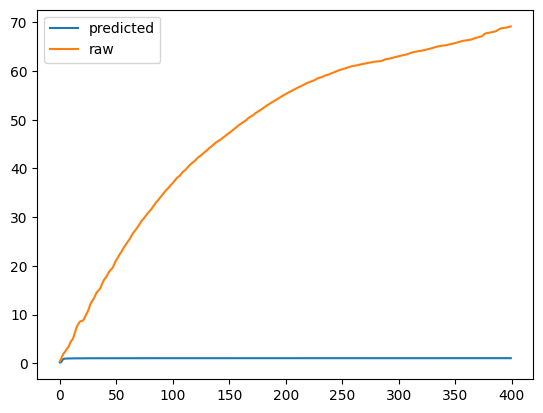

In [22]:
# print(predicted64210)
predicted64210=predicted64210.reshape(400)

# newDF = pd.DataFrame([predicted64210], columns = ['TWTT'])
nuDF = pd.DataFrame(predicted64210, columns = ['predicted'])
# newDF
# testing_Output = pd.DataFrame(testing_Output, columns = ['TWTT2'])


# pd.concat([newDF, df_binned_64210], axis=0)
# newDF = newDF.drop(['TWTT2'], axis=1)
df = nuDF
df['raw'] = df_binned_64210['nuAngle']
# df['diff'] = (df['raw'] - df['predicted'])
# df['diff'] = df['diff'].abs()
# df['diff'] = df['diff']/df['raw']
# df['diff'] = df['diff']*100
# avg = df['diff'].mean()
# print(100 - avg.round(2))
# df = df[:100]
# df.to_csv('predicted.csv')

# image = df['diff'].plot.line()
image2 = df.plot.line()


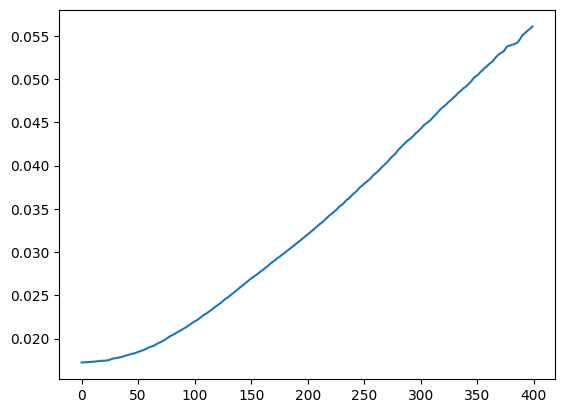

In [182]:
image = df.raw.plot.line()


In [173]:

# df_binned_64210 = df3000[['PingKey','Channel','TWTT','nuAngle']]

# df_binned_64210 = df_binned_64210[df_binned_64210['PingKey'] == 64210 ]
# df_binned_64210 = df_binned_64210[df_binned_64210['Channel'] == 0]
# df_binned_64210 = df_binned_64210.reset_index()
# df_binned_64210 = df_binned_64210.drop(['index'], axis=1)
# output_for_64210 = df_binned_64210[['TWTT','nuAngle']]




,TWTT,TWTT,TWTT,TWTT,TWTT,TWTT,TWTT,TWTT,TWTT,TWTT,TWTT,TWTT,TWTT,TWTT,TWTT,TWTT,TWTT,TWTT,TWTT,TWTT
0,-0.189801,0.017231,0.017231,0.017231,0.017231,-0.189801,0.017231,0.017231,0.017231,0.017231,-0.189801,0.017231,0.017231,0.017231,0.017231,-0.189801,0.017231,0.017231,0.017231,0.017231
1,-0.191870,0.017226,0.017226,0.017226,0.017226,-0.191870,0.017226,0.017226,0.017226,0.017226,-0.191870,0.017226,0.017226,0.017226,0.017226,-0.191870,0.017226,0.017226,0.017226,0.017226
2,-0.190843,0.017230,0.017230,0.017230,0.017230,-0.190843,0.017230,0.017230,0.017230,0.017230,-0.190843,0.017230,0.017230,0.017230,0.017230,-0.190843,0.017230,0.017230,0.017230,0.017230
3,-0.190867,0.017246,0.017246,0.017246,0.017246,-0.190867,0.017246,0.017246,0.017246,0.017246,-0.190867,0.017246,0.017246,0.017246,0.017246,-0.190867,0.017246,0.017246,0.017246,0.017246
4,-0.191310,0.017258,0.017258,0.017258,0.017258,-0.191310,0.017258,0.017258,0.017258,0.017258,-0.191310,0.017258,0.017258,0.017258,0.017258,-0.191310,0.017258,0.017258,0.017258,0.017258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.192459,0.055668,0.055668,0.055668,0.055668,0.192459,0.055668,0.055668,0.055668,0.055668,0.192459,0.055668,0.055668,0.055668,0.055668,0.192459,0.055668,0.055668,0.055668,0.055668
396,0.189772,0.055766,0.055766,0.055766,0.055766,0.189772,0.055766,0.055766,0.055766,0.055766,0.189772,0.055766,0.055766,0.055766,0.055766,0.189772,0.055766,0.055766,0.055766,0.055766
397,0.197060,0.055875,0.055875,0.055875,0.055875,0.197060,0.055875,0.055875,0.055875,0.055875,0.197060,0.055875,0.055875,0.055875,0.055875,0.197060,0.055875,0.055875,0.055875,0.055875
398,0.192786,0.056012,0.056012,0.056012,0.056012,0.192786,0.056012,0.056012,0.056012,0.056012,0.192786,0.056012,0.056012,0.056012,0.056012,0.192786,0.056012,0.056012,0.056012,0.056012


In [ ]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(100, 60))
plt.plot(df['TWTT'], 'o' ,label = 'actual', color = 'red')
plt.plot(newDF['TWTT'], 'o',label = 'predicted', color = 'blue')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(100, 60))
plt.plot(df['nuAngle'], label = 'actual', color = 'red')
plt.plot(newDF['nuAngle'], label = 'predicted', color = 'blue')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['headings'], label = 'actual', color = 'red')
plt.plot(newDF['headings'], label = 'predicted', color = 'blue')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['pitch'], label = 'actual', color = 'red')
plt.plot(newDF['pitch'], label = 'predicted', color = 'blue')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['heaves'], label = 'actual', color = 'red')
plt.plot(newDF['heaves'], label = 'predicted', color = 'blue')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['roll'], label = 'actual', color = 'red')
plt.plot(newDF['roll'], label = 'predicted', color = 'blue')
plt.legend()